In [2]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib as mpl

home= pd.read_csv('Housing.csv')

In [3]:
home.head()

price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished

In [4]:
home.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [5]:
home.describe()

price          area    bedrooms   bathrooms     stories  \
count  5.450000e+02    545.000000  545.000000  545.000000  545.000000   
mean   4.766729e+06   5150.541284    2.965138    1.286239    1.805505   
std    1.870440e+06   2170.141023    0.738064    0.502470    0.867492   
min    1.750000e+06   1650.000000    1.000000    1.000000    1.000000   
25%    3.430000e+06   3600.000000    2.000000    1.000000    1.000000   
50%    4.340000e+06   4600.000000    3.000000    1.000000    2.000000   
75%    5.740000e+06   6360.000000    3.000000    2.000000    2.000000   
max    1.330000e+07  16200.000000    6.000000    4.000000    4.000000   

          parking  
count  545.000000  
mean     0.693578  
std      0.861586  
min      0.000000  
25%      0.000000  
50%      0.000000  
75%      1.000000  
max      3.000000

In [6]:
obj_colums = home.describe(include='object').columns

In [7]:
home.isna().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [8]:
obj_colums

Index(['mainroad', 'guestroom', 'basement', 'hotwaterheating',
       'airconditioning', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [13]:
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
lab=LabelEncoder()
for i in obj_colums:
    home[i]=lab.fit_transform(home[[i]])

C:\Users\Kishore\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Kishore\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Kishore\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Kishore\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

In [12]:
all_cols = home.columns
all_cols

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [14]:
mms = MinMaxScaler()

In [15]:
for i in all_cols[1:]:
    home[i]=mms.fit_transform(home[[i]])

In [16]:
home.describe()

price        area    bedrooms   bathrooms     stories  \
count  5.450000e+02  545.000000  545.000000  545.000000  545.000000   
mean   4.766729e+06    0.240587    0.393028    0.095413    0.268502   
std    1.870440e+06    0.149151    0.147613    0.167490    0.289164   
min    1.750000e+06    0.000000    0.000000    0.000000    0.000000   
25%    3.430000e+06    0.134021    0.200000    0.000000    0.000000   
50%    4.340000e+06    0.202749    0.400000    0.000000    0.333333   
75%    5.740000e+06    0.323711    0.400000    0.333333    0.333333   
max    1.330000e+07    1.000000    1.000000    1.000000    1.000000   

         mainroad   guestroom    basement  hotwaterheating  airconditioning  \
count  545.000000  545.000000  545.000000       545.000000       545.000000   
mean     0.858716    0.177982    0.350459         0.045872         0.315596   
std      0.348635    0.382849    0.477552         0.209399         0.465180   
min      0.000000    0.000000    0.000000         0.000000         0.000000   
25%      1.000000    0.000000    0.000000         0.000000         0.000000   
50%      1.000000    0.000000    0.000000         0.000000         0.000000   
75%      1.000000    0.000000    1.000000         0.000000         1.000000   
max      1.000000    1.000000    1.000000         1.000000         1.000000   

          parking    prefarea  furnishingstatus  
count  545.000000  545.000000        545.000000  
mean     0.231193    0.234862          0.534862  
std      0.287195    0.424302          0.380686  
min      0.000000    0.000000          0.000000  
25%      0.000000    0.000000          0.000000  
50%      0.000000    0.000000          0.500000  
75%      0.333333    0.000000          1.000000  
max      1.000000    1.000000          1.000000

In [17]:
#now the data is ready for traing
yh= home.pop('price')
Xh = home

In [19]:
from sklearn.model_selection import train_test_split
Xh_train,Xh_test,yh_train,yh_test = train_test_split(Xh,yh,test_size=0.2,random_state=42)

In [20]:
Xh_train.shape

(436, 12)

In [21]:
Xh_test.shape

(109, 12)

In [22]:
yh_train.shape

(436,)

In [23]:
yh_test.shape

(109,)

In [24]:
#let us import knn and multiple regressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
regressor = LinearRegression()
knr = KNeighborsRegressor()

In [25]:
#first linear regressor
regressor.fit(Xh_train,yh_train)
home_pred = regressor.predict(Xh_test)

In [26]:
#now KNN regressor
knr.fit(Xh_train,yh_train)
khome_pred = knr.predict(Xh_test)

C:\Users\Kishore\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Kishore\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


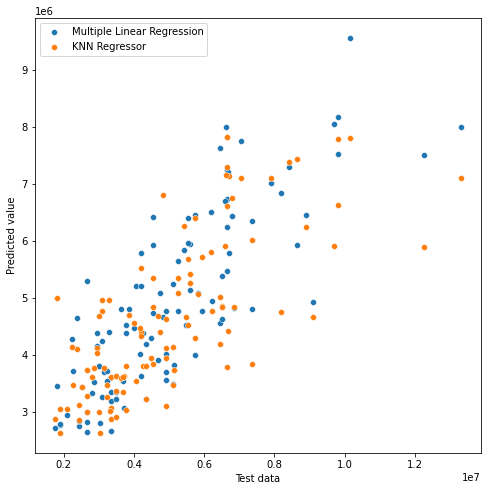

In [27]:
#plotting the results in a plot to see the relation
plt.figure(figsize=(8,8))
sns.scatterplot(yh_test,home_pred)
sns.scatterplot(yh_test,khome_pred)
plt.legend(['Multiple Linear Regression','KNN Regressor'])
plt.xlabel('Test data')
plt.ylabel('Predicted value')
plt.show()


C:\Users\Kishore\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Kishore\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


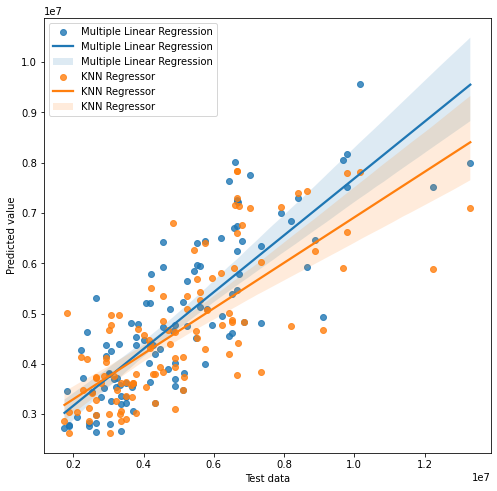

In [28]:
plt.figure(figsize=(8,8))
sns.regplot(yh_test,home_pred)
sns.regplot(yh_test,khome_pred)
plt.legend(['Multiple Linear Regression','Multiple Linear Regression','Multiple Linear Regression','KNN Regressor','KNN Regressor','KNN Regressor'])
plt.xlabel('Test data')
plt.ylabel('Predicted value')
plt.show()

C:\Users\Kishore\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


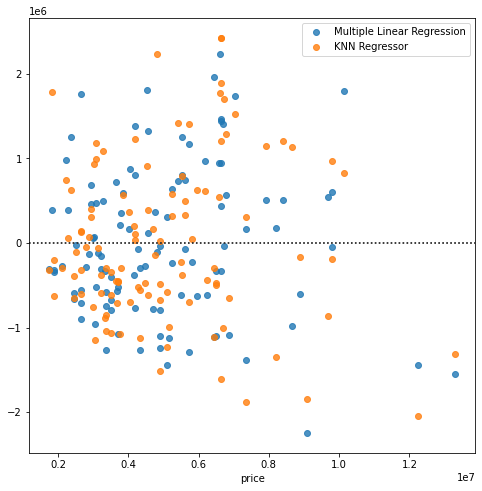

In [29]:
plt.figure(figsize=(8,8))

sns.residplot(yh_test,home_pred,label='Multiple Linear Regression')

sns.residplot(yh_test,khome_pred,label='KNN Regressor')
plt.legend()

In [30]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [31]:
#mlr
rmae = mean_absolute_error(yh_test,home_pred)
rmse = mean_squared_error(yh_test,home_pred)
rr2 = r2_score(yh_test,home_pred)

In [32]:
#knnr
kmae = mean_absolute_error(yh_test,khome_pred)
kmse = mean_squared_error(yh_test,khome_pred)
kr2 = r2_score(yh_test,khome_pred)

In [33]:
metrics = {'MAE':[rmae,kmae],'MSE':[rmse,kmse],'R2 score':[rr2,kr2]}
metrics_df = pd.DataFrame(metrics)
metrics_df.index=['Multiple Linear Regression','KNN Regressor']
metrics_df

MAE           MSE  R2 score
Multiple Linear Regression  9.796797e+05  1.771751e+12  0.649475
KNN Regressor               1.110245e+06  2.534142e+12  0.498643